# Initializing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("keplersmachines/kepler-labelled-time-series-data")

print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /kaggle/input/kepler-labelled-time-series-data


['exoTest.csv', 'exoTrain.csv']

# Loading Dataset


In [3]:
train_data = pd.read_csv(path+'/exoTrain.csv')
test_data = pd.read_csv(path+'/exoTest.csv')

In [4]:
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


# Data preprocessing - target encoding

In [5]:
# changing labels from 2->1 and 1->0
# 1-> exoplanet stars (candidate system)
# 0-> non exoplanet stars

train_data['LABEL'] = train_data['LABEL'].map({2:1,1:0})
test_data['LABEL'] = test_data['LABEL'].map({2:1,1:0})

print(train_data['LABEL'].unique())

[1 0]


 # Exploratory Data Analysis (EDA)

In [6]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [7]:
#train_data.isnull().sum()
train_data.isnull().values.sum()

np.int64(0)

## Plotting average flux curves for both labels

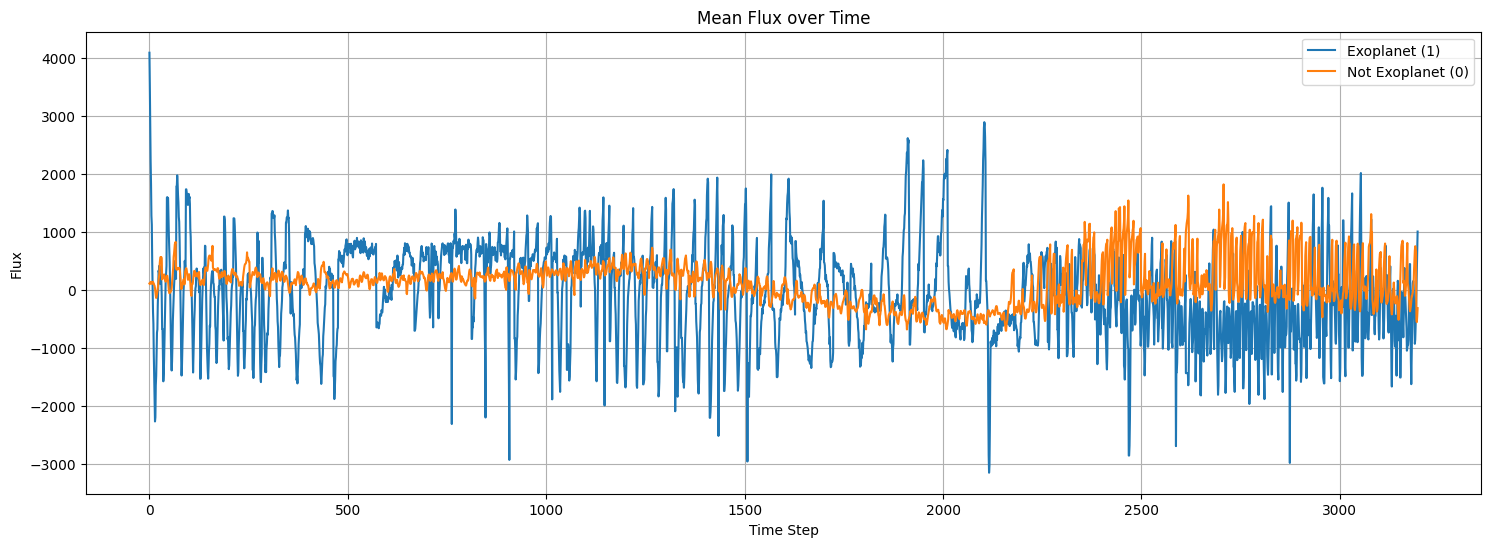

In [8]:
exoplanet_flux = train_data[train_data['LABEL']==1].drop(columns='LABEL')
nonexoplanet_flux = train_data[train_data['LABEL']==0].drop(columns='LABEL')

mean_exo = exoplanet_flux.mean()
mean_non_exo = nonexoplanet_flux.mean()

plt.figure(figsize=(18,6))
plt.plot(mean_exo.values, label='Exoplanet (1)')
plt.plot(mean_non_exo.values, label='Not Exoplanet (0)')
plt.title("Mean Flux over Time")
plt.xlabel("Time Step")
plt.ylabel("Flux")
plt.legend()
plt.grid(True)
plt.show()

## Distribution of both labels

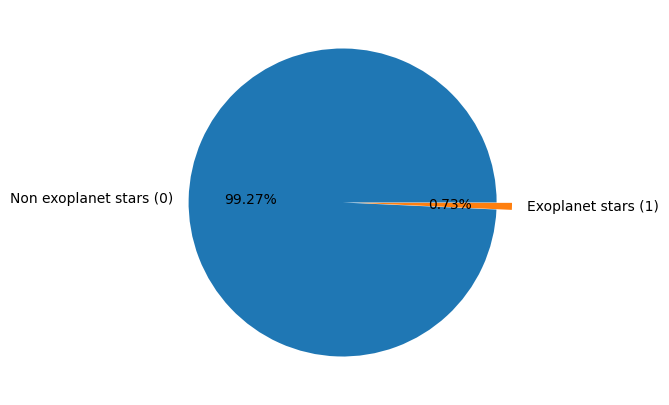

In [9]:
label_counts = train_data['LABEL'].value_counts()
labels = ['Non exoplanet stars (0)','Exoplanet stars (1)']
explode = [0,0.1]
plt.figure(figsize=(5,5))
plt.pie(label_counts,labels=labels,autopct='%1.2f%%',explode=explode)
plt.show()

## Visualizing the flux patterns

### FFT - Periodicity analysis

In [10]:
exoplanets = train_data[train_data['LABEL']==1].drop(columns='LABEL').T
nonexoplanets = train_data[train_data['LABEL']==0].drop(columns='LABEL').T

#### Stars with exoplanet

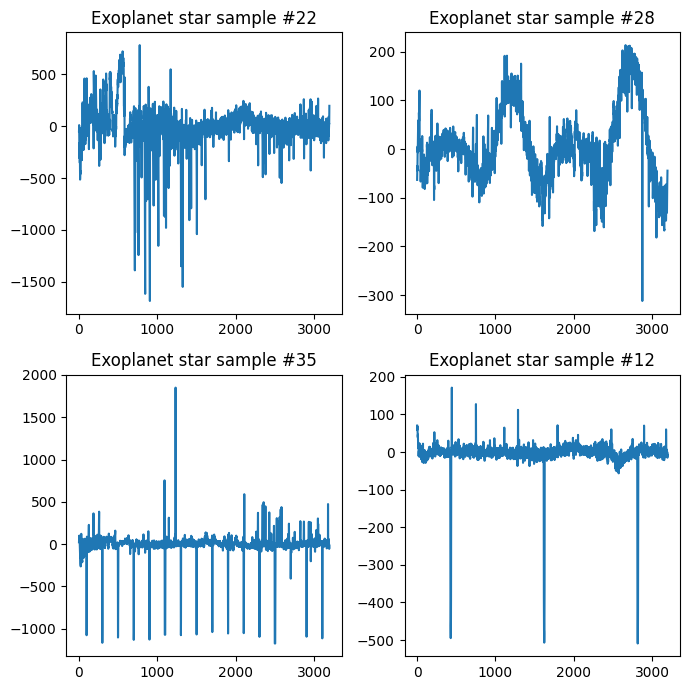

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for i in range(2):
    for j in range(2):
        idx = random.randint(0, exoplanets.shape[1] - 1)
        data = exoplanets.iloc[:, idx]
        axes[i, j].plot(data.values)
        axes[i, j].set_title(f'Exoplanet star sample #{idx}')

plt.tight_layout()
plt.show()


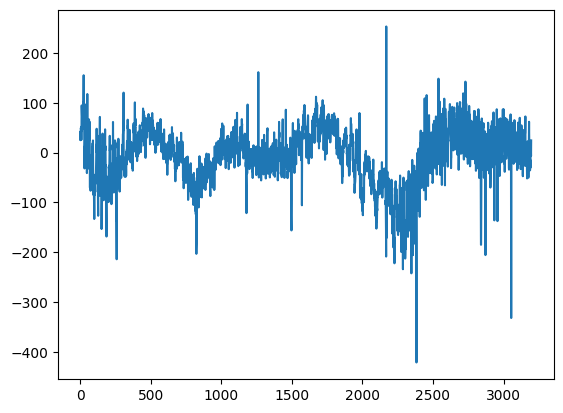

In [12]:
t = np.arange(0,exoplanets.shape[0],1)
plt.plot(t,exoplanets[36])

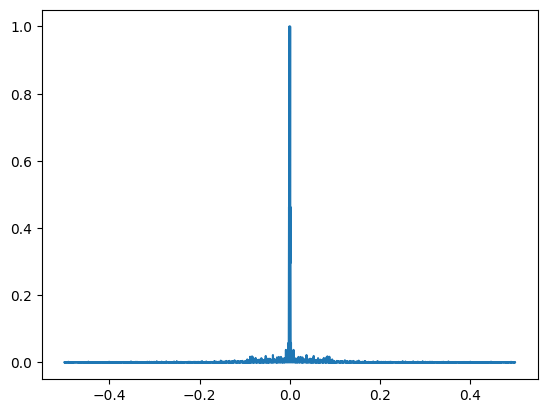

In [13]:
# time domain -> frequency domain
import scipy as sp
exo_fft = sp.fftpack.fft(exoplanets[36].values)
power_density = np.abs(exo_fft)**2
sample_freq = sp.fftpack.fftfreq(len(t))
plt.plot(sample_freq,(power_density/max(power_density)))

#### Stars without exoplanet

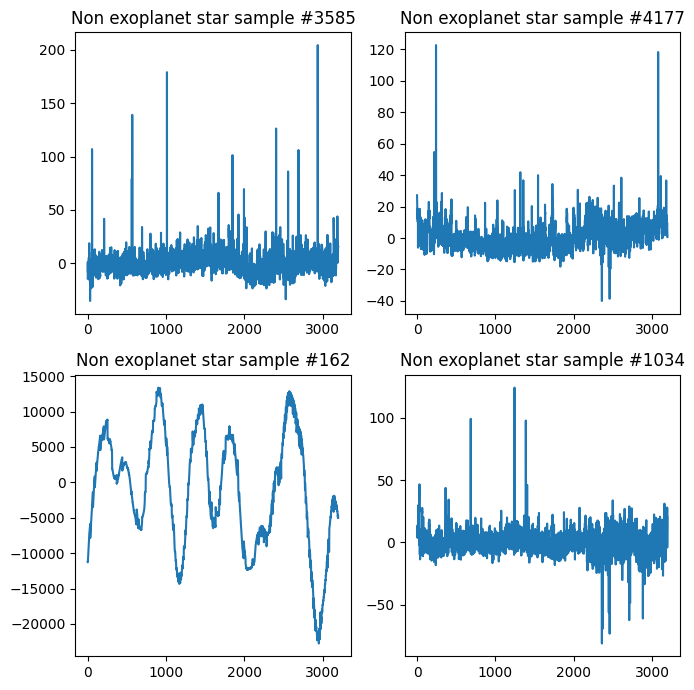

In [14]:

fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for i in range(2):
    for j in range(2):
        idx = random.randint(0, nonexoplanets.shape[1] - 1)
        data = nonexoplanets.iloc[:, idx]
        axes[i,j].plot(data.values)
        axes[i,j].set_title(f'Non exoplanet star sample #{idx}')

plt.tight_layout()
plt.show()

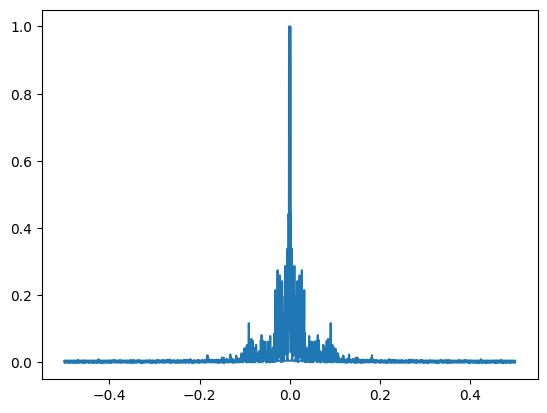

In [15]:
import scipy as sp
nonexo_fft = sp.fftpack.fft(nonexoplanets[3718].values)
power_density = np.abs(nonexo_fft)**2
sample_freq = sp.fftpack.fftfreq(len(t))
plt.plot(sample_freq,(power_density/max(power_density)))

# Feature Extraction

In [16]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from scipy.fft import fft

def extract_features(df):
    features = []

    for i in range(df.shape[0]):
        flux = df.iloc[i, 1:].values
        peaks, _ = find_peaks(-flux, prominence=1)

        fft_vals = np.abs(fft(flux))
        fft_peaks = np.sort(fft_vals)[-5:]

        f = {
            'mean': np.mean(flux),
            'std': np.std(flux),
            'min': np.min(flux),
            'max': np.max(flux),
            'skew': skew(flux),
            'kurtosis': kurtosis(flux),
            'num_dips': len(peaks),
            'avg_dip_depth': np.mean(flux[peaks]) if len(peaks) > 0 else 0,
            'dip_spacing_var': np.var(np.diff(peaks)) if len(peaks) > 1 else 0
        }

        for j, val in enumerate(fft_peaks[:3]):
            f[f'fft_peak_{j+1}'] = val

        features.append(f)

    return pd.DataFrame(features)


In [17]:
X_train_feat = extract_features(train_data)
y_train = train_data['LABEL']

X_test_feat = extract_features(test_data)
y_test = test_data['LABEL']

# Model Training - Using XGBoost Classifier

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [19]:
# train
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_feat, y_train)

# eval
y_pred = xgb.predict(X_test_feat)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:29:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in 

# Model Training I - Using XGBoost + SMOTE

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled = scaler.transform(X_test_feat)
# SMOTE
sm = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train)

# train
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb = XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss')
xgb.fit(X_train_balanced, y_train_balanced)

# eval
y_pred = xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97       565
           1       0.10      0.60      0.18         5

    accuracy                           0.95       570
   macro avg       0.55      0.78      0.58       570
weighted avg       0.99      0.95      0.97       570



# Model Training II - XGBoost + SMOTE + PCA

In [22]:
X_train = train_data.iloc[:,1:]
y_train = train_data['LABEL']

X_test = test_data.iloc[:,1:]
y_test = test_data['LABEL']

# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# SMOTE
X_train_bal, y_train_bal = SMOTE(random_state=42).fit_resample(X_train_pca, y_train)

# train
xgb = XGBClassifier(scale_pos_weight=ratio, eval_metric='logloss')
xgb.fit(X_train_bal, y_train_bal)

# eval
y_pred = xgb.predict(X_test_pca)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       565
           1       0.08      0.20      0.11         5

    accuracy                           0.97       570
   macro avg       0.53      0.59      0.55       570
weighted avg       0.98      0.97      0.98       570



# Inference


## Using lightkurve library

In [23]:
!pip install lightkurve
from lightkurve import search_lightcurve
import matplotlib.pyplot as plt


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 89.9 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=bdb5fd75b85110fdf5ddd58e9b2c3044fc4708b26b0a0a30c1312168d32785ef
  Stored in directory: /root/.cache/pip/wheels/71/ae/f7/5b7e1e16a133d094431428169e9a8d9f750afe5459f0333c9b
  Created wheel for memoization: 

/usr/local/lib/python3.11/dist-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 15 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

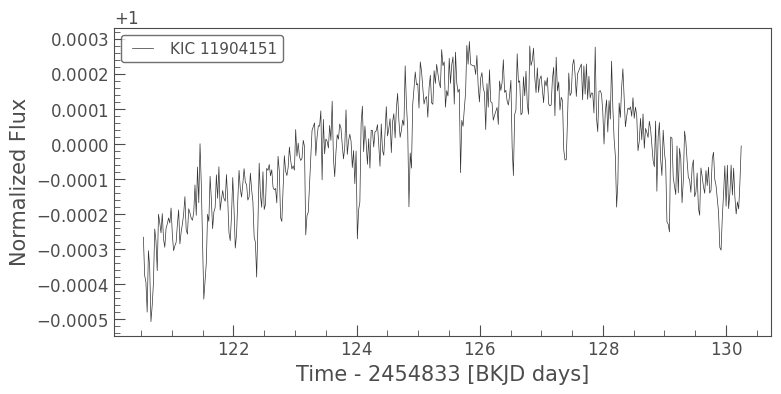

In [24]:
search_result = search_lightcurve("Kepler-10", author="Kepler", cadence="long")
lc = search_result.download()
lc = lc.normalize().remove_nans()
lc.plot()


In [25]:
import numpy as np

flux = lc.flux.value
flux_data = flux.data

desired_length = train_data.shape[1]
if len(flux_data) > desired_length:
    flux = flux_data[:desired_length]
else:
    flux = np.pad(flux_data, (0, desired_length - len(flux_data)), 'constant', constant_values=(0,))

In [26]:
flux_df = pd.DataFrame([flux], columns=[f"FLUX.{i+1}" for i in range(len(flux))])
flux_df.insert(0, 'LABEL', 1)
test_feat = extract_features(flux_df)

In [27]:
# NOTE: RUN THE MODEL I AGAIN TO USE THE SAME SCALER FUNCTION!!!!
test_feat = test_feat[X_train_feat.columns]
test_feat_scaled = scaler.transform(test_feat)
pred = xgb.predict(test_feat_scaled)
print("Prediction:", "Exoplanet" if pred[0] == 1 else "Not an Exoplanet")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- avg_dip_depth
- dip_spacing_var
- fft_peak_1
- fft_peak_2
- fft_peak_3
- ...
Feature names seen at fit time, yet now missing:
- FLUX.1
- FLUX.10
- FLUX.100
- FLUX.1000
- FLUX.1001
- ...
